### All the work herein is solely mine
### Assignment Partner - Jyothsna Devanira

# Problem 4 HW

# Question 1
### Explanation - Used map function to iterate through all elements and pass it to lambda function which returned the reciprocal of each elements. Finally the list was passed to s1(sum function) for calculation.

In [1]:
def f(*x,**y):
    def s1(x):
        s = 0
        if x:
            for i in x:
                s += i
        return s
    
    def p1(x):
        s = 1
        if x:
            for i in x:
                s*= i
        return s
        
    def rec_sum(x):
        return s1(map(lambda x: 1/x, x))
            
    if y["action"] == "sum":
        return s1(*x)
    elif y["action"] == "prod":
        return p1(*x)
    elif y["action"] == "rec_sum":
        return rec_sum(*x)
    else:
        return "Invalid operation"

if __name__ =='__main__':
    xlst = [1,2,3,4,5]
    print(f(xlst, action = "sum"))
    print(f(xlst, action = "prod"))
    print(f(xlst, action = "rec_sum"))

15
120
2.283333333333333


# Question 2
### Explanation - Took arguments from console named data and op. Converted 'data' from string array to int array and finally passed these values to the function through arguments

In [ ]:
import argparse

parser = argparse.ArgumentParser()

parser.add_argument('-data', nargs='+', default = ['1'], help="List of←↩numbers")
parser.add_argument('-op', default = 'sum', help = "sum, prod, rec_sum")

args = parser.parse_args()

xlst = map(lambda d: int(d), args.data)
op = args.op

print(f(xlst, action = op))

### Output:

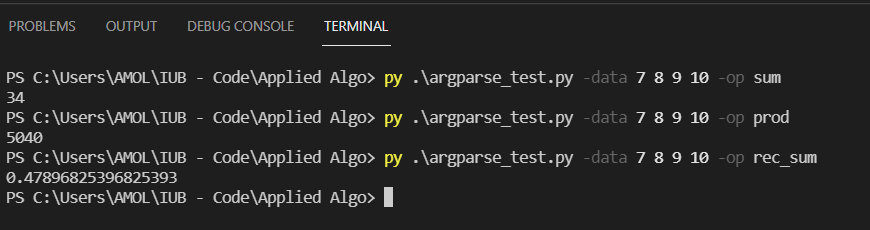

# Question 3
### Explanation - Added __mul__ and cmul functions in class which calculates the complex number multiplication

In [2]:
class complex_:
    def __init__(self, re=0, im=0):
        self.re = re
        self.im = im
    
    def get_re(self):
        return self.re

    def get_im(self):
        return self.im

    def __str__(self):
        g = lambda x:"+" if x >= 0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)"

    def cadd(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)

    def __add__(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)
    
    def cmul(self, other):
        new_re = self.get_re() * other.get_re() + (-1) * self.get_im() * other.get_im()
        new_im = self.get_re() * other.get_im() + other.get_re() * self.get_im()
        return complex_(new_re, new_im)
    
    def __mul__(self, other):
        new_re = self.get_re() * other.get_re() + (-1) * self.get_im() * other.get_im()
        new_im = self.get_re() * other.get_im() + other.get_re() * self.get_im()
        return complex_(new_re, new_im)

if __name__ == '__main__':

    w = complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    print(w)
    print(x)
    print(y)
    print(z)

    print(w.cadd(x).cadd(y).cadd(z))

    print((1-3j) + (-1+3j) + (1+3j) + (-1-3j))

    print(w + x + y + z)
    
    print(w.cmul(x))
    
    print((1+3j) * (3+4j))

    print(w*y)

(1-3i)
(-1+3i)
(1+3i)
(-1-3i)
(0+0i)
0j
(0+0i)
(8+6i)
(-9+13j)
(10+0i)


# Question 4

### <u> Analysis  </u>
#### Generated a huge random array for testing at the start thus every algorithm gets the same set of input
#### The run_average function takes the average functions as input after which it calculates and returns the running time over data. 
#### I have used matplotlibs loglog function to generate the line graph

In [3]:
def average1(S):
    n = len(S)
    my_average = [0]*n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j+1)
    return my_average

In [4]:
def average2(S):
    n = len(S)
    my_average= [0]*n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

In [5]:
def average3(S):
    n = len(S)
    my_average = [0]*n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j+1)
    return my_average

## Note - The following code takes about 8-10 mins to complete.

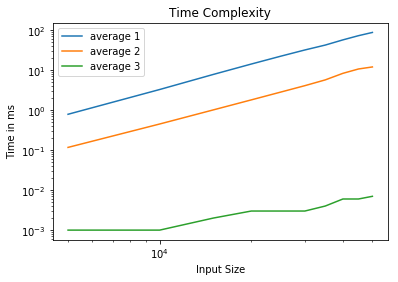

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from random import seed
from random import randint
import time

seed(1)

data = []
x_input = []
data = [randint(0, 1000) for _ in range(100000) ]
x_input = [i for i in range(5000,50001,5000)]

def run_average(fn):
    running_time = []
    for i in range(5000,50001,5000):
        input_arr = data[0:i]
        start = time.time()
        fn(input_arr)
        end = time.time()
        running_time.append(end-start)
    return running_time
    
y_input_1 = run_average(average1)
plt.loglog(x_input, y_input_1, label = "average 1")

y_input_2 = run_average(average2)
plt.loglog(x_input, y_input_2, label = "average 2")

y_input_3 = run_average(average3)
plt.loglog(x_input, y_input_3, label = "average 3")

plt.xlabel('Input Size')
plt.ylabel('Time in ms')
plt.title('Time Complexity')
plt.legend()
plt.show()

#### Time Complexity found - 
#### Average1 - O(n^2)
#### Average2 - O(n^2)
#### Average3 - O(n)

# Question 5

In [8]:
def algorithm1( S):
    #S:sequence
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

In [9]:
def algorithm2(S):
    #S:sequence
    S = sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

In [10]:
def algorithm3(S, start, stop):
    #slice S[start:stop], S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

### <u> Algorithm 1 analysis  </u>
#### Generated a huge sequential array for worst case testing
#### In each iteration run time is calculated for the sliced data after which the size of the data is increased in a controlled manner until 45 seconds has passed. Thus this gives the largest no of elements running under 45sec for this particular algorithm. The largest value varies each time but generally it is around 35000 elements.

#### Time complexity is O(n^2) i.e. Quadratic Time Complexity since there are two 'for loop' used which iterates through all the elements 

In [11]:
data = [i for i in range(100000000) ]

no_of_secs = 45
running_time = 0
i = 0
while True:
    print(i)
    input_data = data[0:i]
    start = time.time()
    algorithm1(input_data)
    end = time.time()
    running_time = (end-start)
    print(running_time)
    if(no_of_secs - int(running_time) > 20):
        i += 10000
    elif(no_of_secs - int(running_time) > 10):
        i += 5000
    elif(no_of_secs - int(running_time) > 5):
        i += 1000
    elif(no_of_secs - int(running_time) > 2):
        i += 500
    elif(no_of_secs - int(running_time) > 0):
        i += 100
    else:
        break

print("\nRunning time - ", running_time)
print("Largest Input size - ", i)

0
0.0
10000
4.354361295700073
20000
17.5770206451416
30000
36.932293176651
31000
40.17864274978638
31500
41.98574781417847
32000
33.91699147224426
37000
44.300873041152954
37100
47.164945125579834

Running time -  47.164945125579834
Largest Input size -  37100


### <u> Algorithm 2 analysis  </u>
#### Generated a huge array in descending order for worst case testing
#### Time complexity is O(n + nlogn) = O(nlogn) since sorted() takes nlogn time and is the dominant term
#### Since there is an out of memory error to test it using a single list, I have run the same algorithm multiple times to get the intended result 
#### Here for input size = 50000000, the algorithm on my laptop takes around 6 secs and 
#### hence the maximum size it can run under 45 sec is near about -
#### 8 x 50000000 = 400000000 elements

In [12]:
import math
import time

data = [i for i in range(100000000,0,-1) ]

running_time = 0
i = 50000000
input_data = data[0:i]

start = time.time()
algorithm2(input_data)
end = time.time()
running_time = (end-start)
print("Time to run for input 50000000 - ", running_time)

no_of_times_to_run = math.ceil(45 / running_time)

start = time.time()
for i in range(0,no_of_times_to_run):
    algorithm2(input_data)

end = time.time()
running_time = (end-start)

print("\nRunning time - ", running_time)
print("Largest input size to run under 45 secs is about ", no_of_times_to_run * 50000000)

Time to run for input 50000000 -  6.206459283828735

Running time -  47.77867794036865
Largest input size to run under 45 secs is about  400000000


### <u> Algorithm 3  </u>

1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0010247230529785156
10
0.0
11
0.0
12
0.0009963512420654297
13
0.0009970664978027344
14
0.0030345916748046875
15
0.004994630813598633
16
0.01096963882446289
17
0.023888349533081055
18
0.04388070106506348
19
0.08980941772460938
20
0.18645238876342773
21
0.3760225772857666
22
0.7898623943328857
23
1.525949239730835
24
3.7978479862213135
25
6.591383695602417
26
14.385574340820312
27
25.807974576950073
28
55.21642231941223

Running time array -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010247230529785156, 0.0, 0.0, 0.0009963512420654297, 0.0009970664978027344, 0.0030345916748046875, 0.004994630813598633, 0.01096963882446289, 0.023888349533081055, 0.04388070106506348, 0.08980941772460938, 0.18645238876342773, 0.3760225772857666, 0.7898623943328857, 1.525949239730835, 3.7978479862213135, 6.591383695602417, 14.385574340820312, 25.807974576950073, 55.21642231941223]
Largest input size -  28


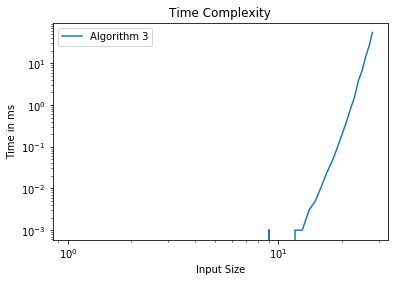

In [13]:
import matplotlib.pyplot as plt

data = [i for i in range(100000000) ]

running_time = []

largest_size = 0
for i in range(1,1000):
    print(i)
    input_data = data[0:i]
    start = time.time()
    algorithm3(input_data, 0, len(input_data))
    end = time.time()
    print(end-start)
    running_time.append(end-start)
    if(int(end - start) > 45):
        largest_size = i
        break

print("\nRunning time array - ", running_time)
print("Largest input size - ", largest_size)

x_input = [j for j in range(1,largest_size+1)]
plt.loglog(x_input, running_time, label = "Algorithm 3")

plt.xlabel('Input Size')
plt.ylabel('Time in ms')
plt.title('Time Complexity')
plt.legend()
plt.show()

### Analysis - 
### Looking at the graph and the running time array, we can see that the time complexity here is EXPONENTIAL,
### and the largest size is 27 for the algorithm to successfully run under 45secs.